# PID control implementation

\begin{align}
MV_k & = \overline{MV} + K_P e_k  + K_I \sum_{k'=0}^k e_{k'}(t_k - t_{k-1}) + K_D \frac{e_k - e_{k-1}}{t_k - t_{k-1}}
\end{align}

\begin{align}
e_k = SP_k - PVk
\end{align}

## Define function

In [15]:
def PID(Kp, Ki, Kd, MV_bar=0):
    #initialize stored data
    e_prev = 0 
    t_prev = -100
    I = 0
    
    # initial control 
    MV = MV_bar
    
    while True:
        t,PV,SP = yield MV
        
        #PID calculation
        e = SP-PV
        
        P = Kp*e
        I = I + Ki*e*(t-t_prev)
        D = Kd*((e-e_prev)/(t-t_prev))
        
        MV = MV_bar + P + I + D
        
        #update stored data for next iteration
        e_prev = e
        t_prev = t

## Simulation

In [16]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter # lib for controller


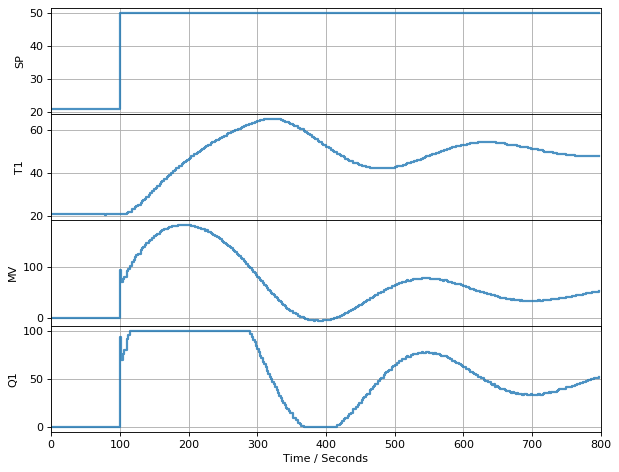

TCLab Model disconnected successfully.


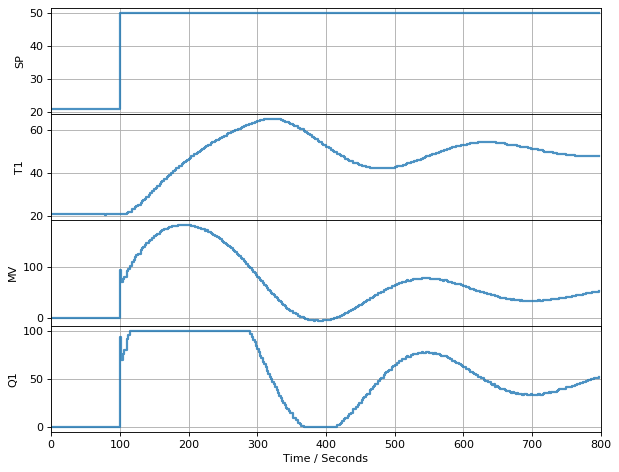

In [18]:
TCLab = setup(connected=False, speedup=100)

controller = PID(2, 0.1, 2) # create pid control
controller.send(None) # starting process (initialize)
t_final = 800

with TCLab() as lab:
    h = Historian([('SP', lambda:SP), ('T1', lambda:lab.T1), ('MV', lambda:MV), ('Q1', lab.Q1)])
    p = Plotter(h, t_final)
    T1 = lab.T1
    for t in clock(t_final, 2):
        SP = T1 if t < 100 else 50 # get setpoint at time 100s T1=50
        PV = lab.T1 # get measurement
        MV = controller.send([t,PV,SP]) # compute manipulated variable
        lab.U1 = MV # appy
        p.update(t) # update infomation display